In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stackindex/MLTollsStackOverflow.csv


In [2]:
sof_df = pd.read_csv('/kaggle/input/stackindex/MLTollsStackOverflow.csv')
sof_df.tail()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
127,19-Aug,57,76,24,20257,4486,1111,212,371,583,...,0,33,0,22,144,0,0,40,16,25
128,19-Sep,54,62,16,19207,4474,1020,135,362,538,...,0,39,0,15,147,0,4,49,28,16
129,19-Oct,73,79,27,23414,5138,1310,188,523,750,...,0,72,0,27,170,0,3,70,21,19
130,19-Nov,72,79,14,23602,4883,1297,199,479,918,...,0,58,2,14,182,0,1,73,16,19
131,19-Dec,82,72,13,20058,4150,1118,159,349,983,...,0,56,0,13,173,0,0,56,16,18


In [3]:
sof_df.columns

Index(['month', 'nltk', 'spacy', 'stanford-nlp', 'python', 'r', 'numpy',
       'scipy', 'matlab', 'machine-learning', 'pandas', 'pytorch', 'keras',
       'nlp', 'apache-spark', 'hadoop', 'pyspark', 'python-3.x', 'tensorflow',
       'deep-learning', 'neural-network', 'lstm', 'time-series', 'pillow',
       'rasa', 'opencv', 'pipenv', 'seaborn', 'Dask', 'jupyter', 'AllenNLP',
       'Theano', 'plotly', 'scikit-learn', 'BeautifulSoup', 'scrapy', 'Gensim',
       'FastText', 'Pydot', 'Pybrain', 'Pytil', 'Pygame', 'Colab', 'Shogun',
       'KNIME', 'Apache', 'Gunicorn', 'Pygtk', 'Weka', 'Conda', 'Ray',
       'matlab.1', 'accord.net', 'regression', 'classification', 'correlation',
       'cluster-analysis', 'H2o', 'Mallet', 'Numba', 'Tableau', 'Trifacta',
       'PyArrow', 'Rasterio', 'Orange3', 'PyMC3', 'Opennn', 'Oryx', 'Istio',
       'Venes', 'Plotnine', 'Gluon', 'Plato', 'Sympy', 'Flair',
       'stanford-nlp.1', 'pyqt', 'Nolearn', 'Lasagne', 'OCR',
       'Apache-spark-mlib', 'azur

In [4]:
sof_df[['year', 'months']] = sof_df.month.str.split('-', expand=True)
sof_df[['year', 'months']]

,year,months
0,09,Jan
1,09,Feb
2,09,Mar
3,09,Apr
4,09,May
...,...,...
127,19,Aug
128,19,Sep
129,19,Oct
130,19,Nov


In [5]:
libraries = sof_df.drop(columns=['month', 'year', 'months'])
libraries.head()

,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,0,0,0,631,8,6,2,19,8,0,...,0,1,0,0,5,0,0,5,0,0
1,1,0,0,633,9,7,3,27,4,0,...,0,0,0,0,5,0,0,11,0,0
2,0,0,0,766,4,4,2,24,3,0,...,0,0,0,0,7,0,0,2,0,0
3,0,0,0,768,12,6,3,32,10,0,...,0,0,0,0,11,0,0,5,0,0
4,1,0,0,1003,2,7,2,42,7,0,...,0,0,0,0,10,0,0,3,0,0


In [6]:
libraries = libraries.sum().sort_values(ascending = False)
libraries.head()

python        1301085.0
r              318365.0
python-3.x     195126.0
pandas         129399.0
matlab          86022.0
dtype: float64

In [7]:
for library in libraries.index:
    if libraries[library] < 10000:
        libraries = libraries.drop(library)

print(libraries.tail())
libraries = pd.DataFrame({'library': libraries.index, 'count': libraries.values})

deep-learning    13916.0
scrapy           12579.0
pyqt             12195.0
Pygame           11565.0
nlp              10664.0
dtype: float64


In [8]:
fig = px.pie(libraries, values='count', names='library')
fig.show()

In [9]:
# https://www.kaggle.com/code/cerolacia/stackoverflow-time-series-eda-and-statistics

def interactive_plot(df, column):
    fig = px.line()
    for i in df.columns[1:]:
        fig.add_scatter(x = df[column], y = df[i], name = i)
    fig.show()

In [10]:
interactive_plot(sof_df, 'month')

## 다운샘플링
시간 간격 조정  
year만 놔두고 month와 months를 제거하자

In [11]:
sof_year = sof_df.drop(columns = ['months', 'month'])
sof_year.head()

,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,...,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine,year
0,0,0,0,631,8,6,2,19,8,0,...,1,0,0,5,0,0,5,0,0,09
1,1,0,0,633,9,7,3,27,4,0,...,0,0,0,5,0,0,11,0,0,09
2,0,0,0,766,4,4,2,24,3,0,...,0,0,0,7,0,0,2,0,0,09
3,0,0,0,768,12,6,3,32,10,0,...,0,0,0,11,0,0,5,0,0,09
4,1,0,0,1003,2,7,2,42,7,0,...,0,0,0,10,0,0,3,0,0,09


In [12]:
sof_year = sof_year.groupby(['year']).sum()
a = sof_year.index
sof_year['year'] = a
sof_year.head()

,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,...,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine,year
year,,,,,,,,,,,,,,,,,,,,,
09,16,0,7,12862,524,159,51,599,96,0,...,4,0,7,163,0,0,72,0,0,09
10,62,0,25,27038,2266,522,201,1822,302,0,...,15,0,25,352,0,0,126,0,1,10
11,172,0,53,42228,5838,1197,375,3934,508,12,...,22,0,53,643,0,0,258,0,1,11
12,246,0,109,64302,12195,2358,841,7268,1044,749,...,46,0,109,881,0,0,350,0,40,12
13,419,0,177,96575,22284,4392,1343,11712,1510,3028,...,145,0,177,1070,0,0,347,0,133,13


In [13]:
print(sof_year.shape)
for i in sof_year.columns:
    if i not in list(libraries.library) and i != 'year':
        sof_year = sof_year.drop(columns=[i])
sof_year.head()
sof_year_m = pd.melt(sof_year, id_vars=sof_year.columns[-1], var_name='library', value_name='count')
print(sof_year.shape)
sof_year_m.head()

(11, 82)
(11, 24)


,year,library,count
0,09,python,12862
1,10,python,27038
2,11,python,42228
3,12,python,64302
4,13,python,96575


In [14]:
fig = px.bar(sof_year_m, x='library', y='count', color='year', height=800)
fig.update_traces(dict(marker_line_width=0))
fig.show()

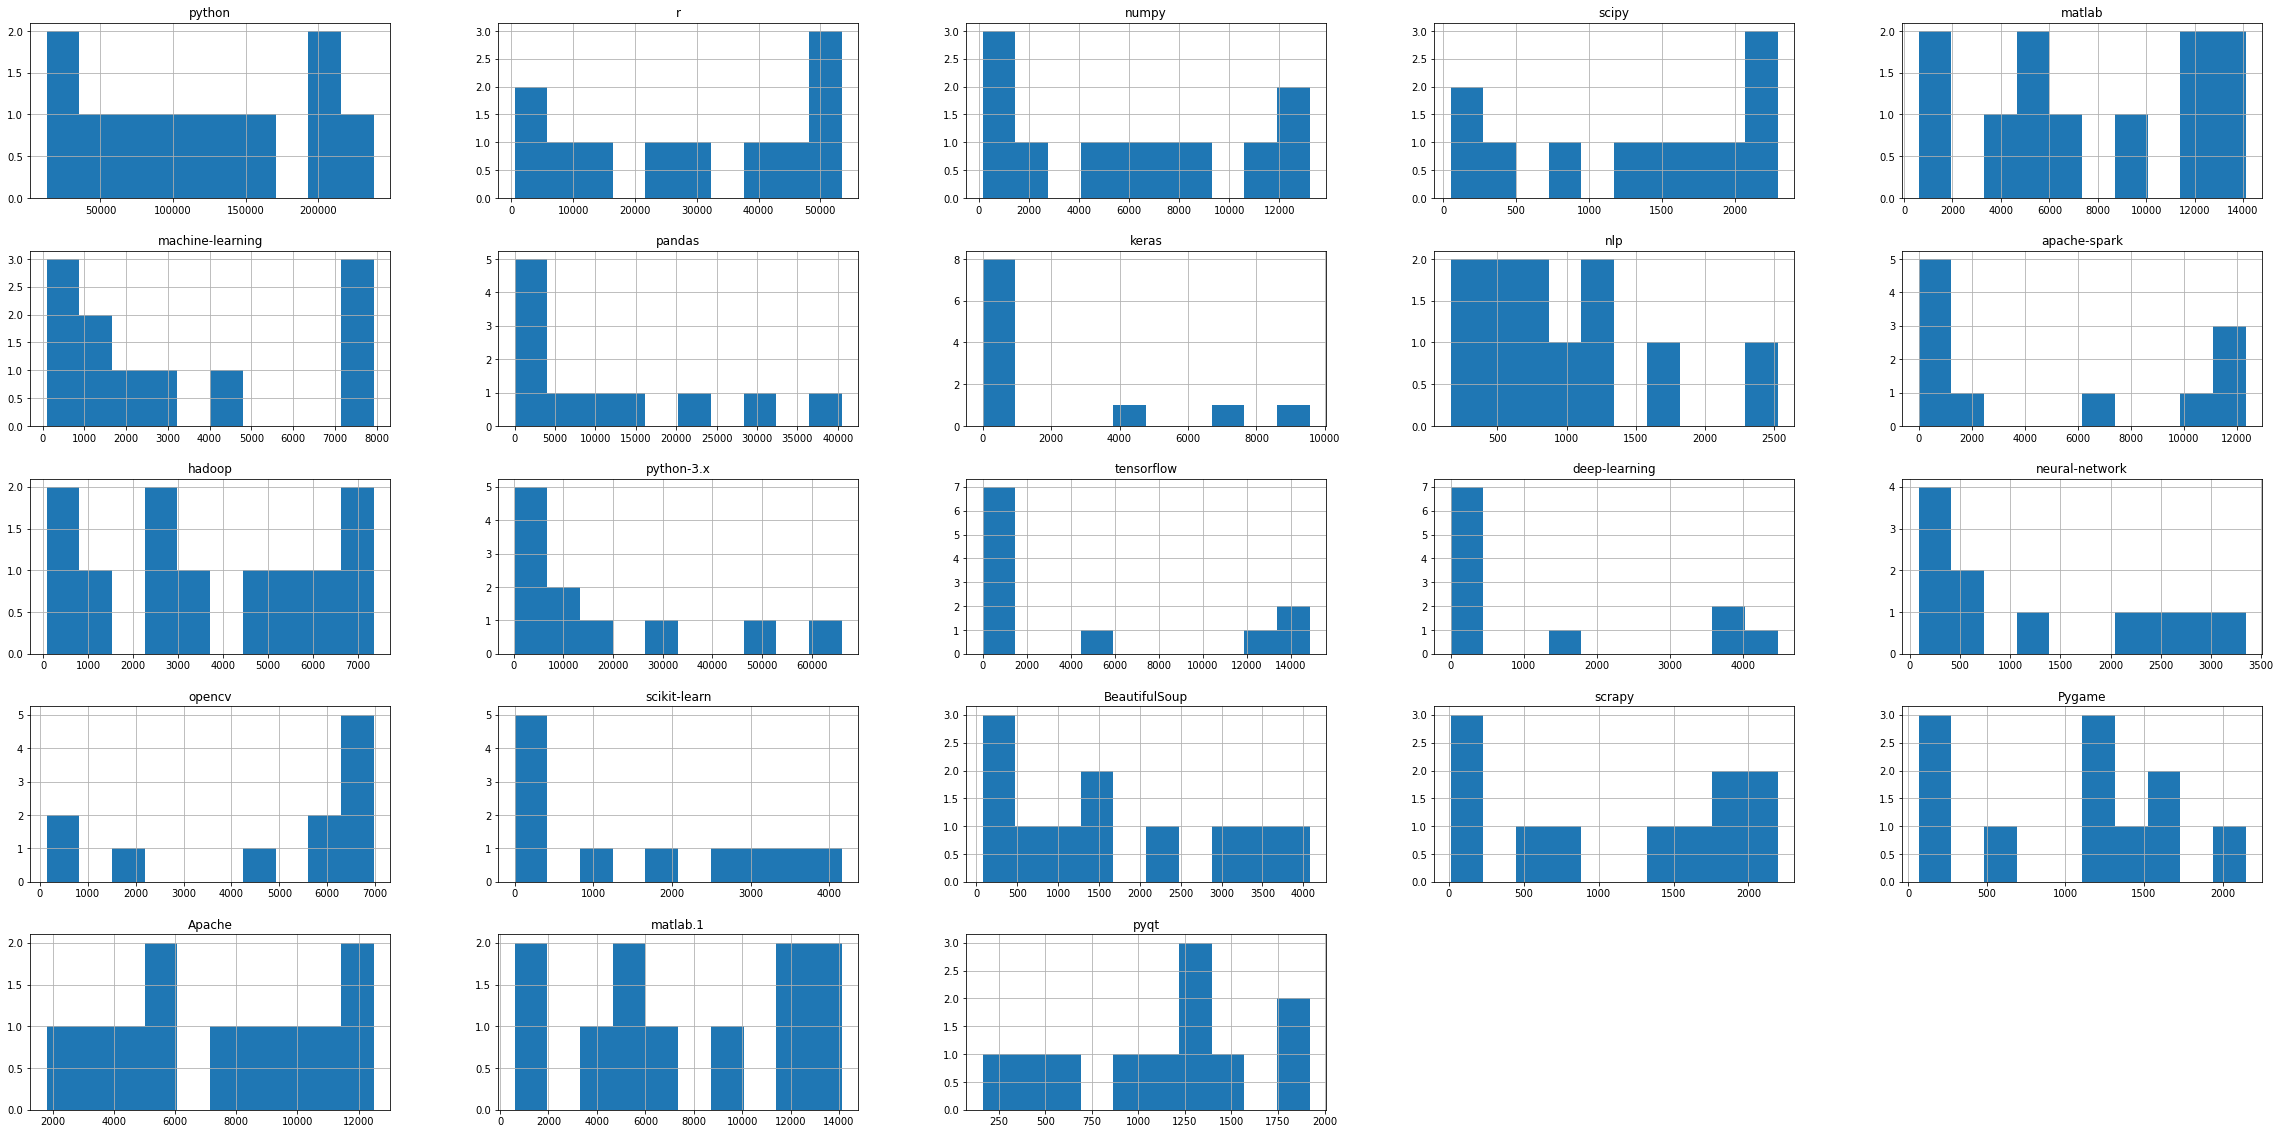

In [15]:
f = plt.figure(figsize=(40,20))
ax = plt.gca()
sof_year.hist(ax=ax,figsize=(40,20))
plt.show()

In [16]:
def time_series(df, i):
    lib = df[df['library'] == i]
    ts = pd.Series(lib['count'].values)#, index=index)
    
    return ts

In [17]:
!pip install pmdarima
from pmdarima.arima import ADFTest

     |████████████████████████████████| 1.4 MB 285 kB/s            


In [18]:
for i in list(libraries.library):
    ts = time_series(sof_year_m, i)
    p_val, should_diff = ADFTest().should_diff(ts)
    print(f'{i: <17} ==> p_val : {p_val:<20} , should_diff : {should_diff}')

python            ==> p_val : 0.07635533845182035  , should_diff : True
r                 ==> p_val : 0.9794484643709738   , should_diff : True
python-3.x        ==> p_val : 0.9876585853411212   , should_diff : True
pandas            ==> p_val : 0.99                 , should_diff : True
matlab            ==> p_val : 0.41458854151937974  , should_diff : True
matlab.1          ==> p_val : 0.4230684200972089   , should_diff : True
Apache            ==> p_val : 0.8764389772699448   , should_diff : True
numpy             ==> p_val : 0.01                 , should_diff : False
apache-spark      ==> p_val : 0.4570407423460193   , should_diff : True
opencv            ==> p_val : 0.32888386221547505  , should_diff : True
tensorflow        ==> p_val : 0.99                 , should_diff : True
hadoop            ==> p_val : 0.013872538967581834 , should_diff : False
machine-learning  ==> p_val : 0.99                 , should_diff : True
keras             ==> p_val : 0.99                 , should_di

numpy와 hadoop을 제외한 것들 모두 비정상 시계열

In [19]:
print(sof_df.shape)
for i in sof_df.columns:
    if i not in list(libraries.library) and i != 'year' and i != 'month' and i != 'months':
        sof_df = sof_df.drop(columns=[i])
sof_df.head()
sof_df_m = pd.melt(sof_df, id_vars='month', var_name='library', value_name='count')
print(sof_df.shape)
sof_df_m.head()

(132, 84)
(132, 26)


,month,library,count
0,09-Jan,python,631
1,09-Feb,python,633
2,09-Mar,python,766
3,09-Apr,python,768
4,09-May,python,1003


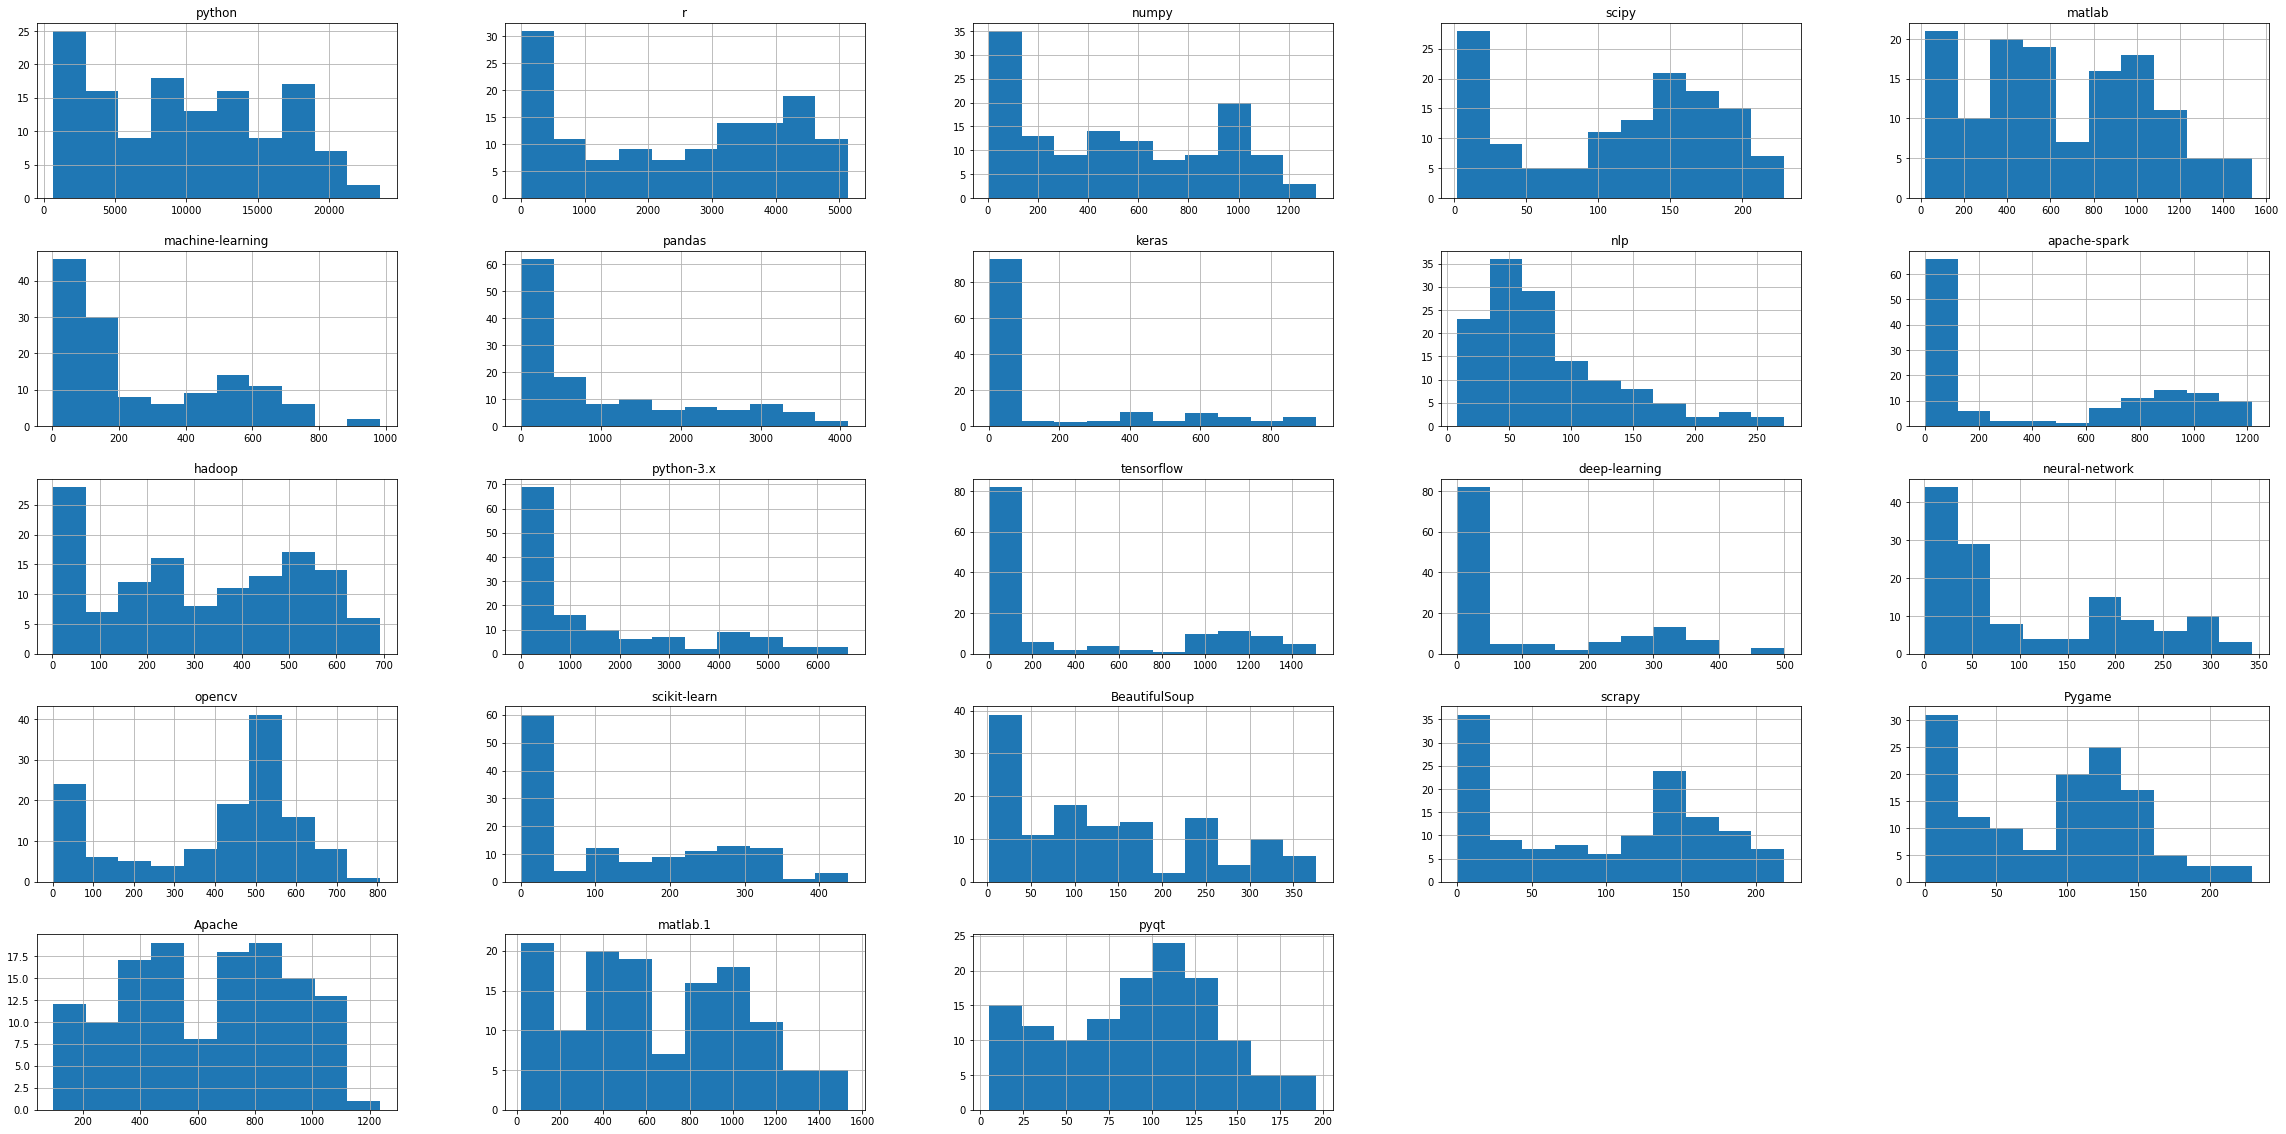

In [20]:
f = plt.figure(figsize=(40,20))
ax = plt.gca()
sof_df.hist(ax=ax,figsize=(40,20))
plt.show()

In [21]:
for i in list(libraries.library):
    ts = time_series(sof_df_m, i)
    p_val, should_diff = ADFTest().should_diff(ts)
    print(f'{i: <17} ==> p_val : {p_val:<20} , should_diff : {should_diff}')

python            ==> p_val : 0.09258065794729356  , should_diff : True
r                 ==> p_val : 0.6495986769583642   , should_diff : True
python-3.x        ==> p_val : 0.99                 , should_diff : True
pandas            ==> p_val : 0.99                 , should_diff : True
matlab            ==> p_val : 0.9814373514769034   , should_diff : True
matlab.1          ==> p_val : 0.982132982917286    , should_diff : True
Apache            ==> p_val : 0.9621865766384354   , should_diff : True
numpy             ==> p_val : 0.2128143581409963   , should_diff : True
apache-spark      ==> p_val : 0.8683581193437154   , should_diff : True
opencv            ==> p_val : 0.5891001842935033   , should_diff : True
tensorflow        ==> p_val : 0.7724387970898033   , should_diff : True
hadoop            ==> p_val : 0.99                 , should_diff : True
machine-learning  ==> p_val : 0.7787425169680251   , should_diff : True
keras             ==> p_val : 0.99                 , should_diff